# Biodiversity 

## Data Science Career Path Project




In [3]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

# load the data
observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [4]:
# investigate
print(observations.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [5]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [6]:
# merge the data
df = observations.merge(species, how='outer')

print(df.head())

      scientific_name                            park_name  observations  \
0  Vicia benghalensis  Great Smoky Mountains National Park            68   
1  Vicia benghalensis               Yosemite National Park           148   
2  Vicia benghalensis            Yellowstone National Park           247   
3  Vicia benghalensis                  Bryce National Park           104   
4      Neovison vison  Great Smoky Mountains National Park            77   

         category                        common_names conservation_status  
0  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
1  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
2  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
3  Vascular Plant  Purple Vetch, Reddish Tufted Vetch                 NaN  
4          Mammal                       American Mink                 NaN  


In [7]:
print(len(observations), len(species), len(df))

23296 5824 25632


In [21]:
print('df.describe()')
print(df.describe())
print('df.info()')
print(df.info())
print('species.info()')
print(species.info())
print('observations.info()')
print(observations.info())

df.describe()
       observations
count  25632.000000
mean     142.214693
std       69.912475
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
df.info()
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 25631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      25632 non-null  object
 1   park_name            25632 non-null  object
 2   observations         25632 non-null  int64 
 3   category             25632 non-null  object
 4   common_names         25632 non-null  object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB
None
species.info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category         

In [10]:
print(df.scientific_name.nunique(), len(df.scientific_name))

5541 25632


In [31]:
# add column to separate plant and animal

def new_column(row):
    if row['category'] == 'Vascular Plant':
        return 'plant'
    elif row['category'] == 'Nonvascular Plant':
        return 'plant'
    else:
        return 'animal'


df['kind'] = df.apply(new_column, axis = 1)


# Interestingly, the average oberservation count was about 125 times, regardless of the kind of species

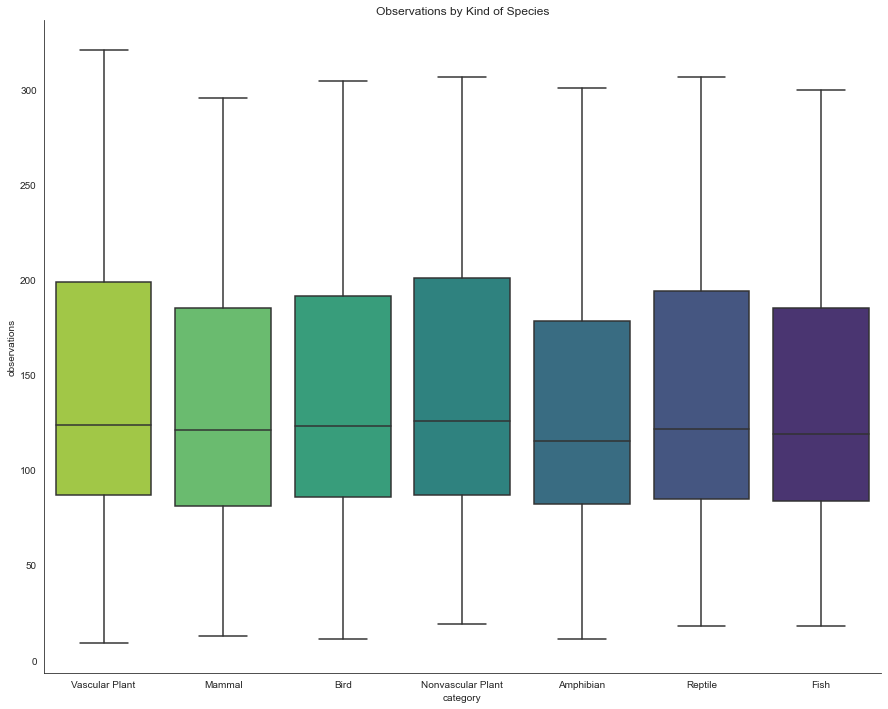

In [32]:
plt.figure(figsize = (15, 12))
sns.set_style('white')
#sns.set_palette('hls', 7)
sns.set_palette('viridis_r', 7)
plt.title('Observations by Kind of Species')

sns.boxplot(data = df, x = 'category', y = 'observations')
sns.despine()
plt.show()

# In total, there were about four plant observations for one animal

([<matplotlib.patches.Wedge at 0x7fbba49338e0>,
 [Text(-0.9195302179948585, 0.6037086865321124, 'plants'),
  Text(0.9195302462565009, -0.6037086434857952, 'animals')],
 [Text(-0.5015619370881046, 0.32929564719933396, '81.5%'),
  Text(0.5015619525035458, -0.32929562371952464, '18.5%')])

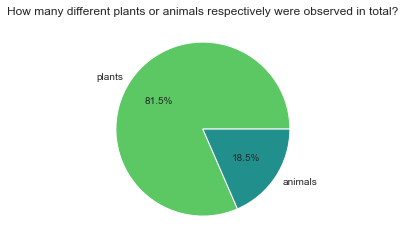

In [43]:
plt.title('How many different plants or animals respectively were observed in total?')
sns.set_palette('viridis', 3)

plt.pie([len(df[df.kind == 'plant']), len(df[df.kind == 'animal'])], autopct = '%0.1f%%', labels=['plants', 'animals'])

# The majority of observations took place in Yellowstone National Park. 

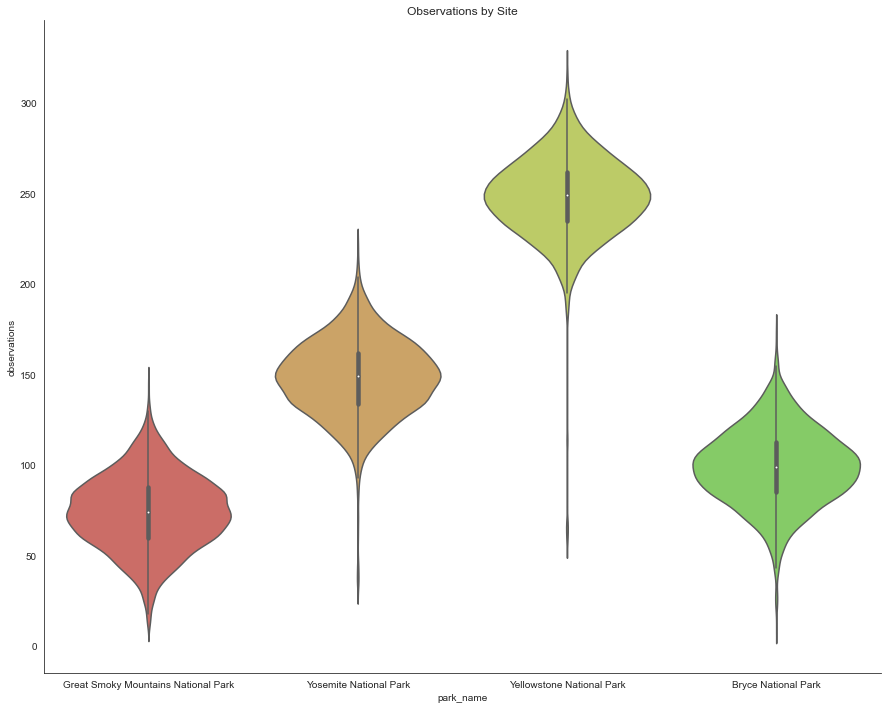

In [34]:
plt.figure(figsize = (15, 12))
plt.title('Observations by Site')
sns.set_palette('hls', 11)
site_order = ['Great Smoky Mountains National Park', 'Yosemite National Park', 'Yellowstone National Park', 'Bryce National Park']
sns.violinplot(data = observations, x = 'park_name', y = 'observations', order = site_order)
sns.despine()


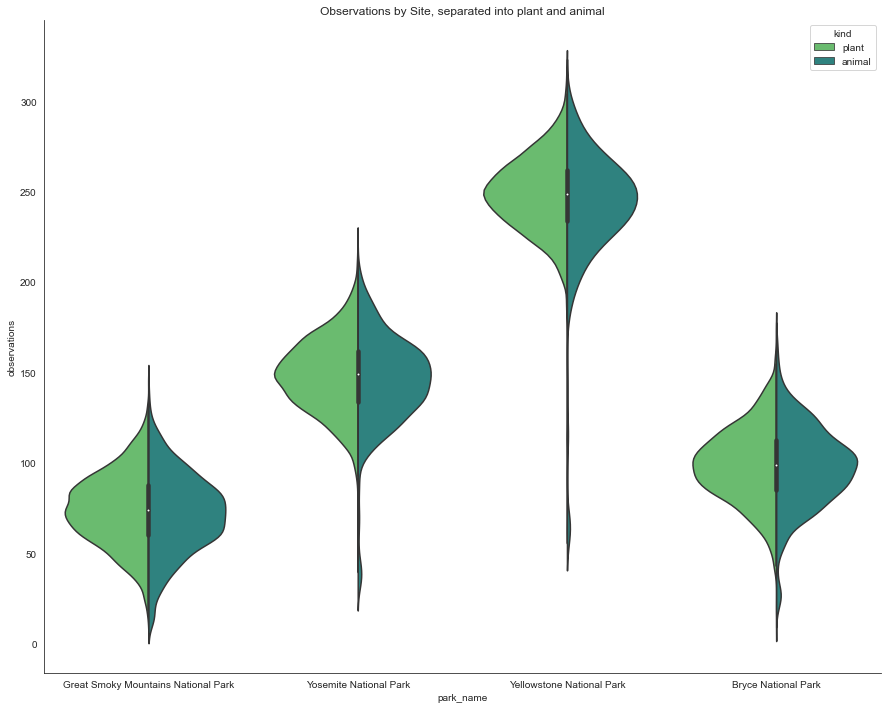

In [35]:
plt.figure(figsize = (15, 12))
sns.set_palette('viridis_r', 3)

plt.title('Observations by Site, separated into plant and animal')

sns.violinplot(data = df, x = 'park_name', y = 'observations', hue = 'kind', split=True)
sns.despine()

#print(df.head(50))

In [36]:
print(df.columns)

Index(['scientific_name', 'park_name', 'observations', 'category',
       'common_names', 'conservation_status', 'kind'],
      dtype='object')


## Kinds of species found in Yellowstone National Park

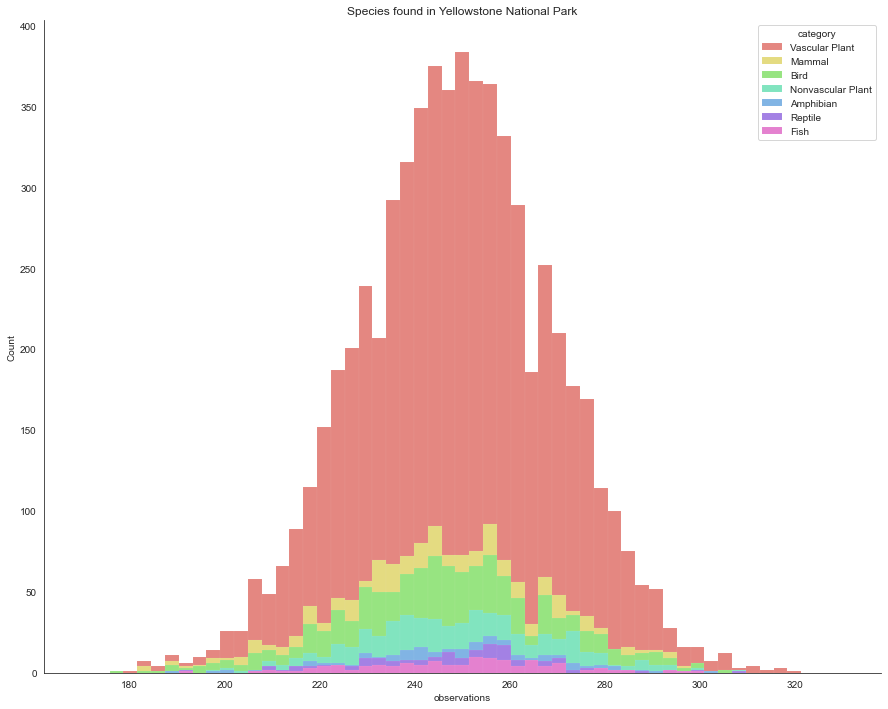

In [37]:
ynp = df[df.park_name == 'Yellowstone National Park']
sns.set_palette('hls', 7)


plt.figure(figsize = (15, 12))
plt.title('Species found in Yellowstone National Park')

sns.histplot(
    ynp,
    x="observations", hue="category",
    multiple="stack",
    binrange = (170, 330),
    linewidth=.05
)
sns.despine()

# Endangered Species

## The data about conservation status is incomplete, less than 200 out of almost 6000 species are labeled.

In [38]:
print(species.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [39]:
endangered = df[df.conservation_status == 'Endangered']

print(endangered.head(), len(endangered))

        scientific_name                            park_name  observations  \
1400  Picoides borealis               Yosemite National Park            43   
1401  Picoides borealis  Great Smoky Mountains National Park            15   
1402  Picoides borealis            Yellowstone National Park            64   
1403  Picoides borealis                  Bryce National Park            24   
2476       Rana sierrae               Yosemite National Park            42   

       category                      common_names conservation_status    kind  
1400       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1401       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1402       Bird           Red-Cockaded Woodpecker          Endangered  animal  
1403       Bird           Red-Cockaded Woodpecker          Endangered  animal  
2476  Amphibian  Sierra Nevada Yellow-Legged Frog          Endangered  animal   80


## The labeled species are mainly animals.

([<matplotlib.patches.Wedge at 0x7fbba29ac910>,
 [Text(1.0864571742518743, 0.1720779140872905, 'plants'),
  Text(-1.086457180293535, -0.17207787594174204, 'animals')],
 [Text(0.5926130041373858, 0.09386068041124936, '5.0%'),
  Text(-0.5926130074328372, -0.09386065960458655, '95.0%')])

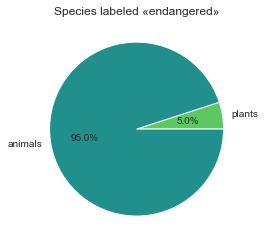

In [46]:
plt.title('Species labeled «endangered»')
sns.set_palette('viridis', 3)
plt.pie([len(endangered[endangered.kind == 'plant']), len(endangered[endangered.kind == 'animal'])], autopct = '%0.1f%%', labels=['plants', 'animals'])

Text(0.5, 1.0, 'Conservation Status of Species by Category')

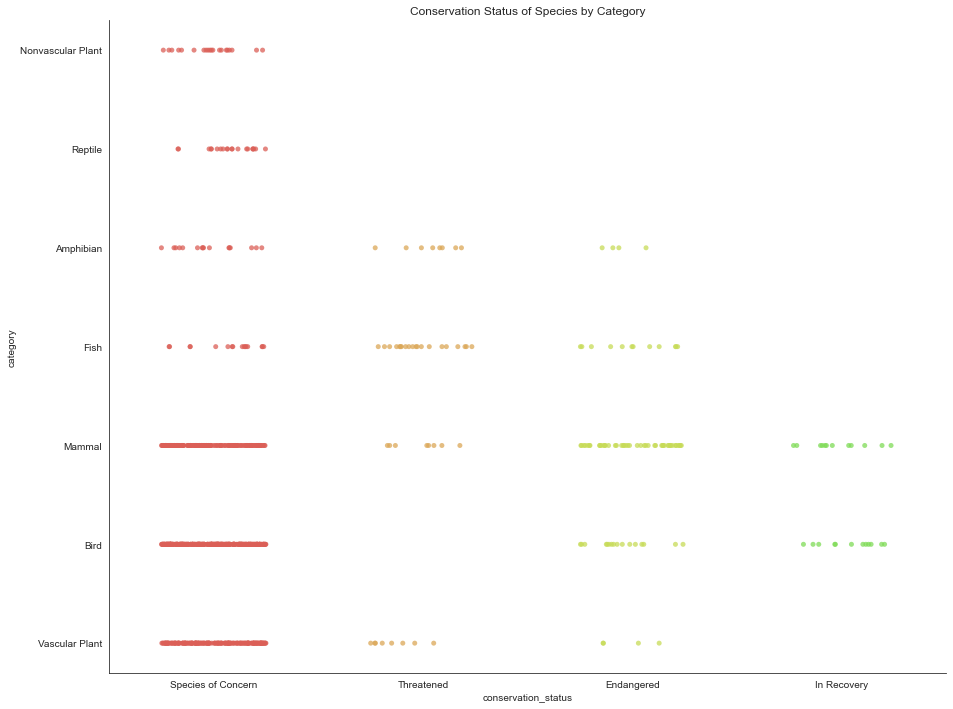

In [48]:
plt.figure(figsize = (15, 12))
sns.set_palette('hls', 11)
sns.stripplot(data = df, x = 'conservation_status', y = 'category', jitter=0.25, alpha=.75)
sns.despine()
plt.title('Conservation Status of Species by Category')
#print(df.head(50))

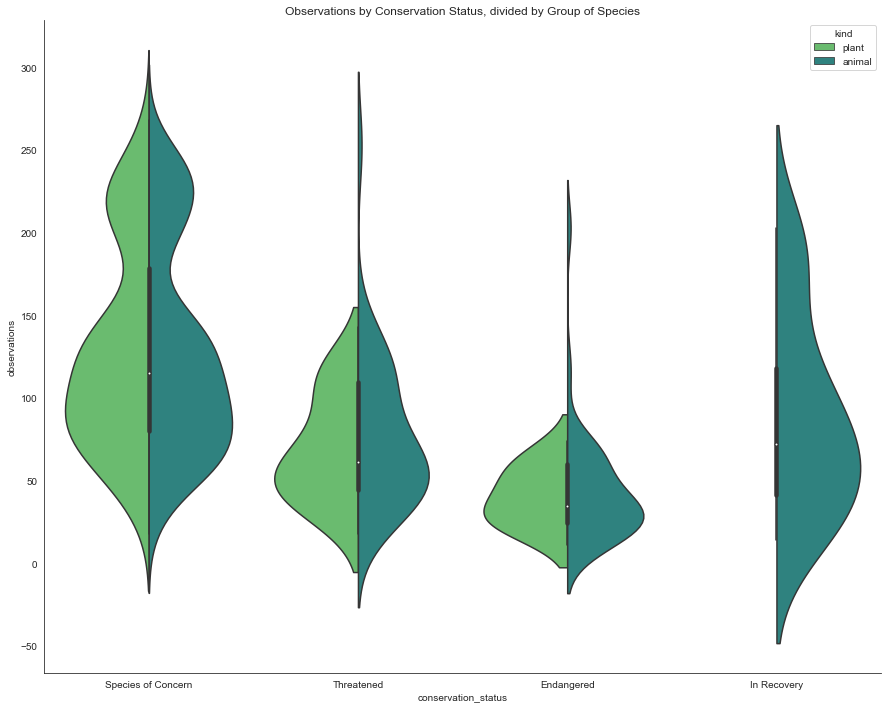

In [49]:
plt.figure(figsize = (15, 12))
plt.title('Observations by Conservation Status, divided by Group of Species')
sns.set_palette('viridis_r', 3)

sns.violinplot(data = df, x = 'conservation_status', y = 'observations', hue = 'kind', split=True)
sns.despine()